#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this book are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.01 Frequency, Amplitude, and Phase</font>
# <font color=red>Give it a TRY!</font>
# <font color=red>Part 4</font>

### Setup

In [3]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))


# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))
sampling_interval = 0.001 # 1 ms = 1 KHz sample rate
time_length = 1 # second
time = np.arange(0,time_length, sampling_interval)
time_length_2 = 2
time2 = np.arange(0,time_length_2, sampling_interval)
time_length_3 = 0.5
time3 = np.arange(0,time_length_3, sampling_interval)

# <font color=red>DSP.01.G4) Greyscale Images</font>
# <font color=red>DSP.01.G4.a) Loading and Displaying Image Files</font>

In [4]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

#find and select file "Woood-Grey.jpg"
file_path = filedialog.askopenfilename()
image = img.imread(file_path)
make_imshow(image)
plt.show()  

This picture was taken by J. Christopher Edgar in Albuquerque, New Mexico, using a light field camera.

### <font color=red>DSP.01.G4.b) Loading and Displaying Images Files</font>

Using the loaded image, find out some information about your image. 

How many values are used to create the image?

What is the size of the matrix used to represent the image?

Create a plot showing the range of values used to represent this image. In your figure, are all grayscale
values equally represented?

In [6]:
image.shape   

(864, 1026)

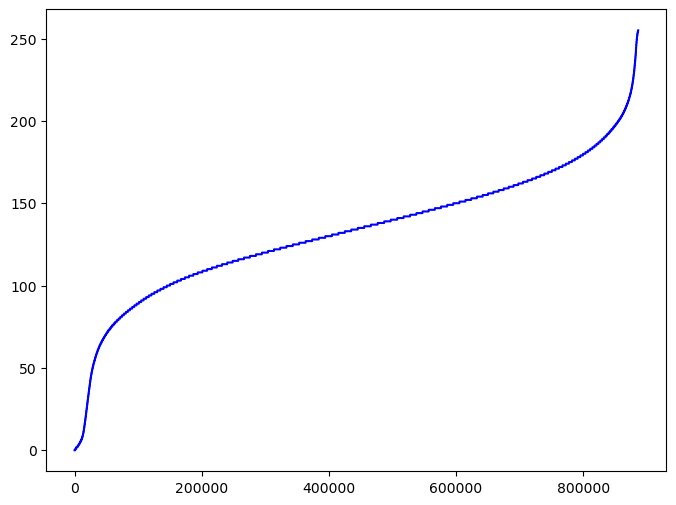

In [5]:
image_flattern = np.sort(image.flatten())
plt.plot(image_flattern,'blue')
plt.show() 

The 2D matrix 'image' contains the values used to represent the image. The Numpy method 'shape' indicates that the image is composed of a matrix containing 864 * 1026 = 886,464 values. This matrix is 864 columns by 1026 rows (notice that the height of the image (# rows) is slighty more than the width (# columns)). The graph above shows the range of values contained in the image. As indicated on the y axis, the values range from 0 to 255. A '0' value represents pure black, a '255' value represents pure white, and the values in-between represent shades of gray. The grayscale image shown above shows a full range of grayscale values.